# Classifcation_tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Ghassen\Desktop\Data Files\Movie_classification.csv", header=0)

In [4]:
df.shape

(506, 19)

In [5]:
pd.set_option('display.max_rows',19)
pd.set_option('display.max_columns',19)

In [6]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [7]:
df.dtypes.value_counts()

float64    12
int64       5
object      2
dtype: int64

In [8]:
df.duplicated().any()

False

YES    279
NO     227
Name: 3D_available, dtype: int64


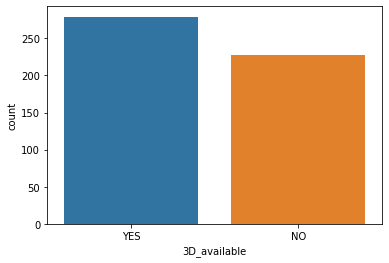

In [9]:
#df['3D_available'].value_counts().plot.bar()
print(df['3D_available'].value_counts())
sns.countplot(x='3D_available',data=df)

1    0.545455
0    0.454545
Name: Start_Tech_Oscar, dtype: float64


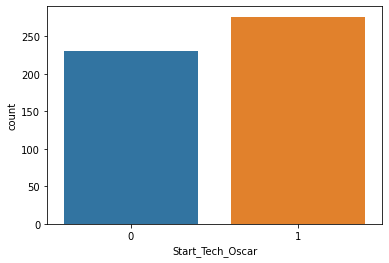

In [10]:
print(df['Start_Tech_Oscar'].value_counts(normalize=True))
sns.countplot(x='Start_Tech_Oscar',data=df)

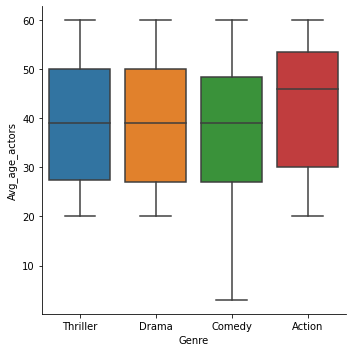

In [11]:
sns.catplot(x="Genre", y="Avg_age_actors", kind="box", data=df)

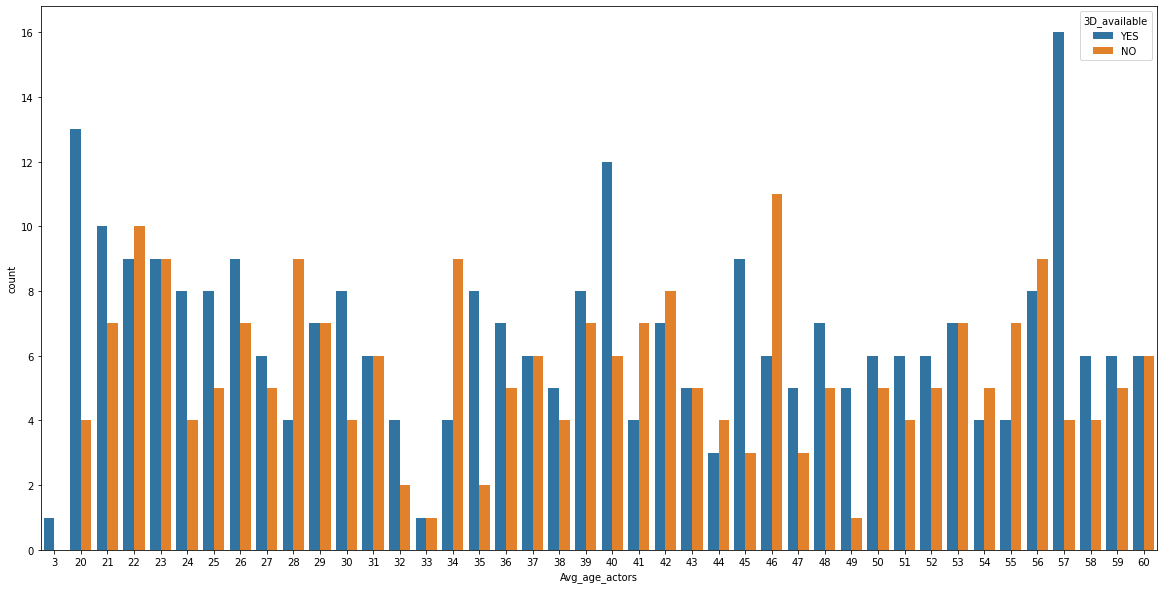

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x="Avg_age_actors", hue="3D_available",data=df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


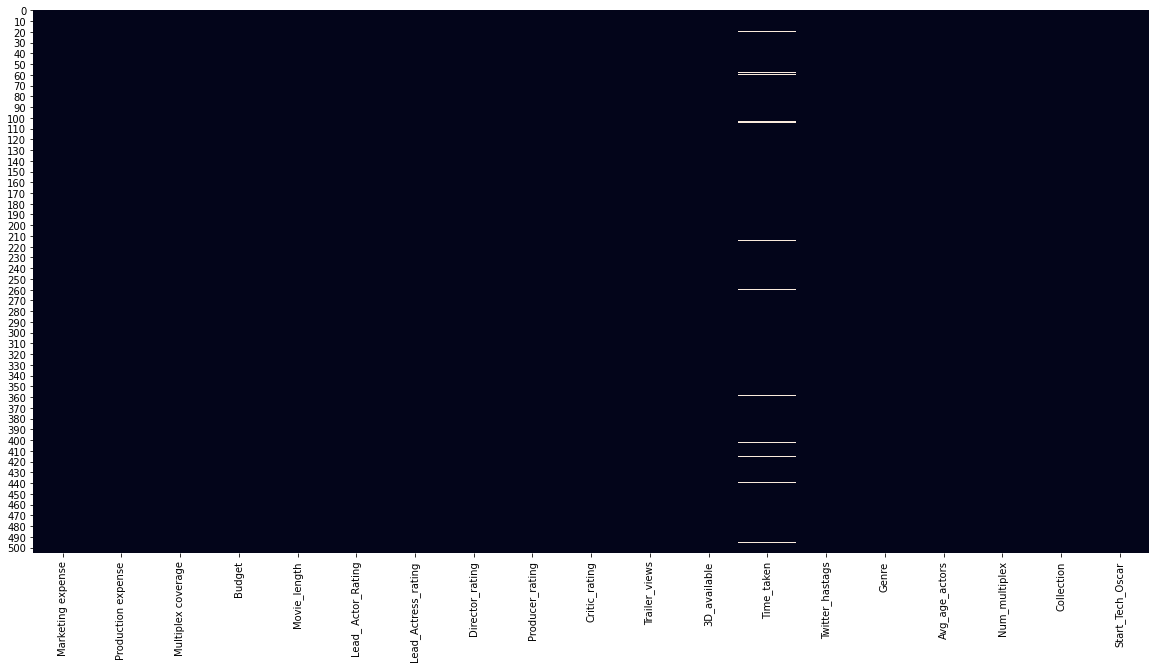

In [15]:
# or use sns.heatmap to detect the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [16]:
df['Time_taken'].isna().sum()/df.shape[0]

0.023715415019762844

### Missing Value Imputation

In [17]:
df['Time_taken'].mean()

157.39149797570855

In [18]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


0


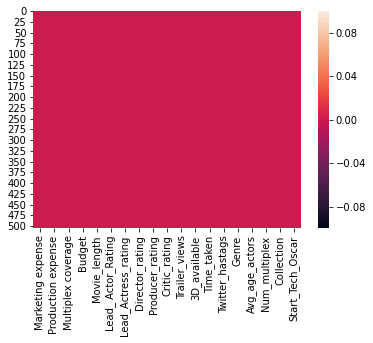

In [20]:
print(df['Time_taken'].isna().sum())
sns.heatmap(df.isna())

### qualitative variables

In [21]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}, {df[col].unique()}')

3D_available--------------------------------------, ['YES' 'NO']
Genre---------------------------------------------, ['Thriller' 'Drama' 'Comedy' 'Action']


### Dummy Variable Creation

In [22]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [23]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)

In [24]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,225.792,55,395,72400,1,0,0,1,0


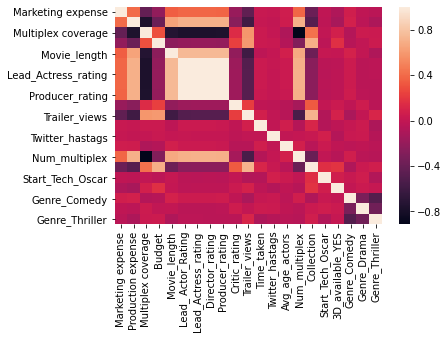

In [25]:
sns.heatmap(df.corr())

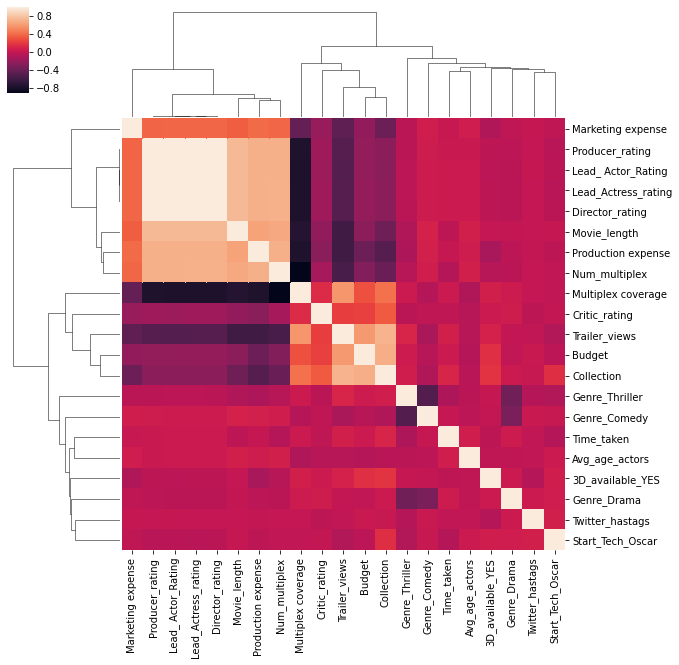

In [26]:
sns.clustermap(df.corr())

In [27]:
df.keys()

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection', 'Start_Tech_Oscar', '3D_available_YES', 'Genre_Comedy',
       'Genre_Drama', 'Genre_Thriller'],
      dtype='object')

### X-y split

In [28]:
X = df.loc[:,df.columns!="Start_Tech_Oscar"]
type(X)

pandas.core.frame.DataFrame

In [29]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,176.48,225.792,55,395,72400,0,0,1,0


In [30]:
X.shape

(506, 20)

In [31]:
y = df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [33]:
y.shape

(506,)

### Test-Train Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [36]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,...,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,...,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,...,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,...,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,...,172.16,301.664,60,589,20800,1,0,0,0


In [37]:
X_train.shape

(404, 20)

In [38]:
X_test.shape

(102, 20)

### Training Classification Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clftree = DecisionTreeClassifier(max_depth = 3)
clfrf = RandomForestClassifier(n_estimators=1000, max_depth=4, min_samples_split=24, random_state=1)

In [40]:
print(clftree.fit(X_train, y_train))
clfrf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)


RandomForestClassifier(max_depth=4, min_samples_split=24, n_estimators=1000,
                       random_state=1)

### Predict values using trained model

In [41]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

y1_train_pred = clfrf.predict(X_train)
y1_test_pred = clfrf.predict(X_test)

In [42]:
print(y_test_pred)

y1_test_pred

[0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0]


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

### Model Performance

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [44]:
print(confusion_matrix(y_train, y_train_pred))

confusion_matrix(y_train, y1_train_pred)

[[172  14]
 [126  92]]


array([[154,  32],
       [ 47, 171]], dtype=int64)

In [45]:
print(confusion_matrix(y_test, y_test_pred))

confusion_matrix(y_test, y1_test_pred)

[[39  5]
 [41 17]]


array([[26, 18],
       [25, 33]], dtype=int64)

In [46]:
print(accuracy_score(y_test, y_test_pred))

accuracy_score(y_test, y1_test_pred)

0.5490196078431373


0.5784313725490197

In [47]:
print(confusion_matrix(y_test, y1_test_pred))
print(classification_report(y_test, y1_test_pred))

[[26 18]
 [25 33]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        44
           1       0.65      0.57      0.61        58

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.59      0.58      0.58       102



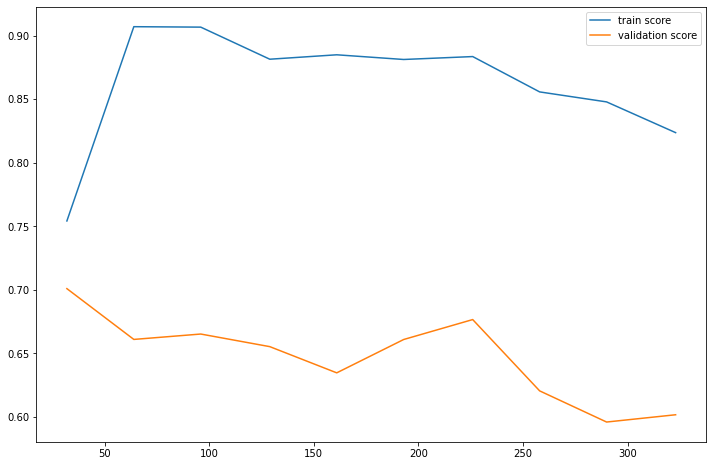

In [48]:
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import f_classif, chi2

N, train_score, val_score=learning_curve(clfrf,X_train,y_train,cv=5,scoring='f1', 
                                             train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12,8))
plt.plot(N,train_score.mean(axis=1),label='train score')
plt.plot(N,val_score.mean(axis=1),label='validation score')
plt.legend()

In [49]:
clfrf.feature_importances_

array([0.07358296, 0.02551015, 0.02402104, 0.18282881, 0.02827565,
       0.04871946, 0.05041145, 0.04080963, 0.05896402, 0.02477681,
       0.09923027, 0.07101064, 0.05210862, 0.02975905, 0.0305636 ,
       0.14740517, 0.00269515, 0.00138343, 0.0038012 , 0.00414288])

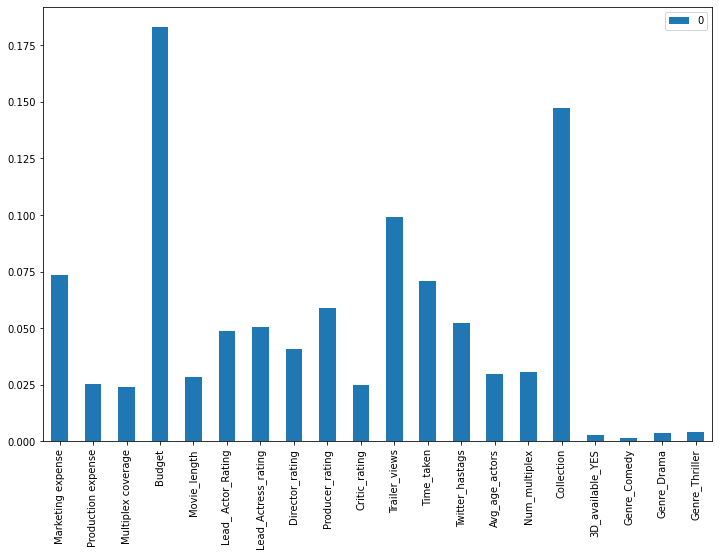

In [50]:
pd.DataFrame(clfrf.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

### Logistic with Multiple predictor

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
X = df.loc[:, df.columns != 'Start_Tech_Oscar']

In [53]:
y = df['Start_Tech_Oscar']

In [54]:
clf_lr = LogisticRegression()
clf_lr.fit(X,y)

LogisticRegression()

In [55]:
clf_lr.coef_

array([[ 2.17692347e-04,  1.18729188e-03,  1.86779613e-05,
        -8.23540965e-05,  2.31171529e-03, -1.82970340e-05,
        -2.38172435e-05, -2.20672404e-05, -2.93877579e-05,
         1.03025078e-04, -7.19199166e-06, -9.73469708e-04,
         9.82169960e-03,  1.80621660e-03,  1.21806223e-03,
         6.24087750e-05,  4.28378456e-05,  2.80976976e-05,
         3.74951682e-05, -5.25293839e-05]])

In [56]:
clf_lr.intercept_

array([2.42364942e-05])

In [57]:
import statsmodels.api as sn

In [58]:
X_cons = sn.add_constant(X)

In [59]:
X_cons.head()

,const,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,1.0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,...,109.60,223.840,23,494,48000,1,0,0,1
1,1.0,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,...,146.64,243.456,42,462,43200,0,0,1,0
2,1.0,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,...,147.88,2022.400,38,458,69400,0,1,0,0
3,1.0,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,...,185.36,225.344,45,472,66800,1,0,1,0
4,1.0,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,...,176.48,225.792,55,395,72400,0,0,1,0


In [60]:
import statsmodels.discrete.discrete_model as sm

In [61]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.581579
         Iterations 7


In [62]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Start_Tech_Oscar   No. Observations:                  506
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                           20
Date:                Sun, 01 Aug 2021   Pseudo R-squ.:                  0.1559
Time:                        02:22:46   Log-Likelihood:                -294.28
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 3.360e-14
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.9433      4.164      5.030      0.000      12.782      29.104
Marketing expense       0.0007      0.001      1.016      0.310      -0.001       0.002
Production expense      0.0045      0.013      0.353      0.724      -0.021       0.030
Multiplex coverage     -4.9238      2.576     -1.912      0.056      -9.972       0.124
Budget                 -0.0002   4.83e-05     -3.823      0.000      -0.000      -9e-05
Movie_length            0.0058      0.006      0.920      0.358      -0.007       0.018
Lead_ Actor_Rating      2.0478      1.676      1.222      0.222      -1.238       5.333
Lead_Actress_rating    -2.5189      1.794     -1.404      0.160      -6.035       0.998
Director_rating         1.8018      1.744      1.033      0.301      -1.616       5.220
Producer_rating        -2.0443      0.960     -2.130      0.033      -3.926      -0.163
Critic_rating          -0.3868      0.169     -2.289      0.022      -0.718      -0.056
Trailer_views       -1.502e-05   2.99e-06     -5.028      0.000   -2.09e-05   -9.16e-06
Time_taken             -0.0075      0.003     -2.225      0.026      -0.014      -0.001
Twitter_hastags         0.0028      0.002      1.163      0.245      -0.002       0.007
Avg_age_actors          0.0038      0.008      0.467      0.641      -0.012       0.020
Num_multiplex          -0.0025      0.002     -1.057      0.290      -0.007       0.002
Collection              0.0001   1.42e-05      7.340      0.000    7.66e-05       0.000
3D_available_YES        0.2217      0.206      1.075      0.282      -0.182       0.626
Genre_Comedy           -0.0363      0.323     -0.112      0.910      -0.669       0.596
Genre_Drama            -0.0219      0.351     -0.063      0.950      -0.709       0.665
Genre_Thriller         -0.3932      0.315     -1.250      0.211      -1.010       0.223
=======================================================================================
"""

### Predicting and confusion matrix

In [63]:
clf_lr.predict_proba(X)

array([[6.62431381e-01, 3.37568619e-01],
       [6.15059401e-01, 3.84940599e-01],
       [1.76309148e-08, 9.99999982e-01],
       ...,
       [6.25231949e-01, 3.74768051e-01],
       [4.51244376e-01, 5.48755624e-01],
       [7.40725118e-01, 2.59274882e-01]])

In [64]:
y_pred = clf_lr.predict(X)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [65]:
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)

In [66]:
y_pred_03

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[125, 105],
       [ 92, 184]], dtype=int64)

In [68]:
confusion_matrix(y, y_pred_03)

array([[ 13, 217],
       [  9, 267]], dtype=int64)

### Linear Discriminant Analysis

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [71]:
y_pred_lda = clf_lda.predict(X) 

In [72]:
y_pred_lda

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [73]:
confusion_matrix(y, y_pred_lda)

array([[142,  88],
       [ 85, 191]], dtype=int64)

### Performance metrics
* Precision
$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$
* Recall
$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$
* AUC (ROC) 

In [74]:
from sklearn.metrics import precision_score, recall_score

In [75]:
precision_score(y, y_pred)

0.6366782006920415

In [76]:
recall_score(y, y_pred)

0.6666666666666666

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y, y_pred)

0.6050724637681159

### LogesticRegression

In [79]:
from sklearn.linear_model import LogisticRegression

[[105  81]
 [ 77 141]]
[[31 13]
 [24 34]]
0.6372549019607843
              precision    recall  f1-score   support

           0       0.56      0.70      0.63        44
           1       0.72      0.59      0.65        58

    accuracy                           0.64       102
   macro avg       0.64      0.65      0.64       102
weighted avg       0.65      0.64      0.64       102



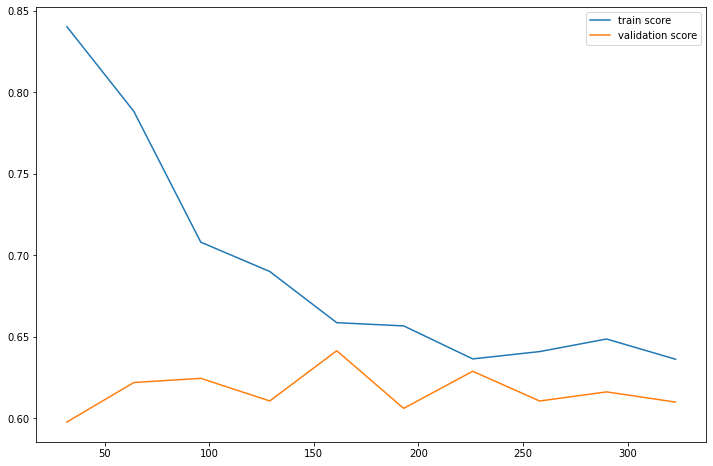

In [80]:
clflr=LogisticRegression()

clflr.fit(X_train,y_train)

y2_test_pred = clflr.predict(X_test)
y2_train_pred = clflr.predict(X_train)

print(confusion_matrix(y_train, y2_train_pred))
print(confusion_matrix(y_test, y2_test_pred))

print(accuracy_score(y_test, y2_test_pred))

print(classification_report(y_test, y2_test_pred))

N, train_score, val_score=learning_curve(clflr,X_train,y_train,cv=5,scoring='f1', 
                                             train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12,8))
plt.plot(N,train_score.mean(axis=1),label='train score')
plt.plot(N,val_score.mean(axis=1),label='validation score')
plt.legend()

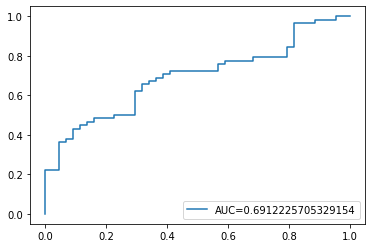

In [81]:
from sklearn import metrics
y_pred_proba = clflr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#print(fpr)
#print(auc)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### K-Nearest Neighbors

In [82]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [83]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [84]:
X_test_s

array([[-4.36752612e-01, -1.26009787e+00,  7.59976330e-01, ...,
         1.51338117e+00, -4.93864798e-01, -7.54473836e-01],
       [ 4.63542006e-01,  1.09537107e+00, -6.84309089e-01, ...,
         1.51338117e+00, -4.93864798e-01, -7.54473836e-01],
       [-4.32134764e-01,  4.28041039e-01, -1.73890573e-04, ...,
         1.51338117e+00, -4.93864798e-01, -7.54473836e-01],
       ...,
       [-4.28689797e-01, -9.60512654e-01,  8.19099125e-01, ...,
        -6.60772062e-01, -4.93864798e-01,  1.32542701e+00],
       [-4.29554231e-01, -9.50442563e-02,  5.15039037e-01, ...,
         1.51338117e+00, -4.93864798e-01, -7.54473836e-01],
       [-4.30782121e-01, -4.16820968e-01,  2.53209516e-01, ...,
        -6.60772062e-01, -4.93864798e-01, -7.54473836e-01]])

In [85]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
confusion_matrix(y_test, clf_knn_1.predict(X_test_s))

array([[24, 20],
       [23, 35]], dtype=int64)

In [87]:
accuracy_score(y_test, clf_knn_1.predict(X_test_s))

0.5784313725490197

In [88]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(X_test_s))

0.5294117647058824

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}

In [91]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [92]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [93]:
grid_search_cv.best_params_

{'n_neighbors': 5}

In [94]:
clf_knn_5 = KNeighborsClassifier(n_neighbors=5)
clf_knn_5.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_5.predict(X_test_s))

0.5882352941176471

In [95]:
optimised_KNN = grid_search_cv.best_estimator_

In [96]:
y_test_pred = optimised_KNN.predict(X_test_s) 

In [97]:
confusion_matrix(y_test, y_test_pred)

array([[26, 18],
       [24, 34]], dtype=int64)

In [98]:
accuracy_score(y_test, y_test_pred)

0.5882352941176471

### SGDClassifier

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s1 = scaler.transform(X_train)
X_test_s1 = scaler.transform(X_test)

In [101]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train_s1, y_train)

SGDClassifier(loss='log')

In [102]:
y_pred = clf.predict(X_test_s1)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.47


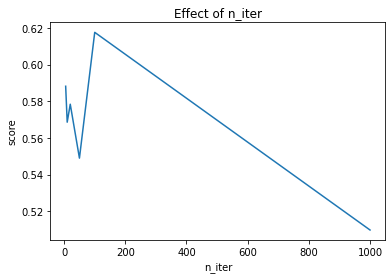

In [103]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(X_train_s1, y_train)
    scores.append(clf.score(X_test_s1, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [104]:
clf1 = SGDClassifier(loss="hinge", penalty="l2")
clf1.fit(X_train_s1, y_train)

SGDClassifier()

In [105]:
y1_pred = clf.predict(X_test_s1)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y1_pred)))

Accuracy: 0.51


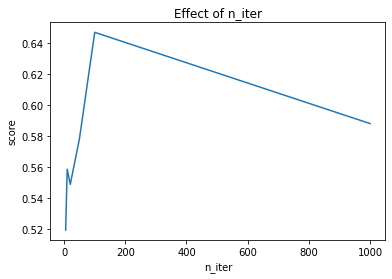

In [106]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train_s1, y_train)
    scores.append(clf.score(X_test_s1, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [107]:
import time
from sklearn import svm
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_s1, y_train)
stop = time.time()
print(f"Training time for linear SVM with SGD training: {stop - start}s")

start = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(X_train_s1, y_train)
stop = time.time()
print(f"Training time for linear SVM without SGD training: {stop - start}s")

Training time for linear SVM with SGD training: 0.0018634796142578125s
Training time for linear SVM without SGD training: 0.03711390495300293s


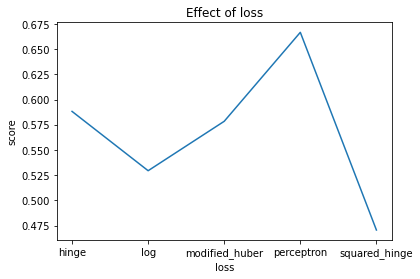

In [108]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train_s1, y_train)
    scores.append(clf.score(X_test_s1, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [109]:
from sklearn.model_selection import GridSearchCV
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train_s1, y_train)

print(grid.best_params_) 

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [110]:
grid_predictions = grid.predict(X_test_s1) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.56


## VotingClassifier

In [111]:
from sklearn.ensemble import VotingClassifier
model_vc=VotingClassifier([('SGD',clf),('KNN',clf_knn_5),('LR',clflr),('DTREE',clftree)],voting='hard')

In [112]:
for model in (clf,clf_knn_5,clflr,clftree):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,round(model.score(X_test,y_test),2))

SGDClassifier 0.57
KNeighborsClassifier 0.55
LogisticRegression 0.64
DecisionTreeClassifier 0.55


### Plotting decision tree

In [113]:
from sklearn import tree
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [114]:
from IPython.display import Image

In [115]:
import pydotplus

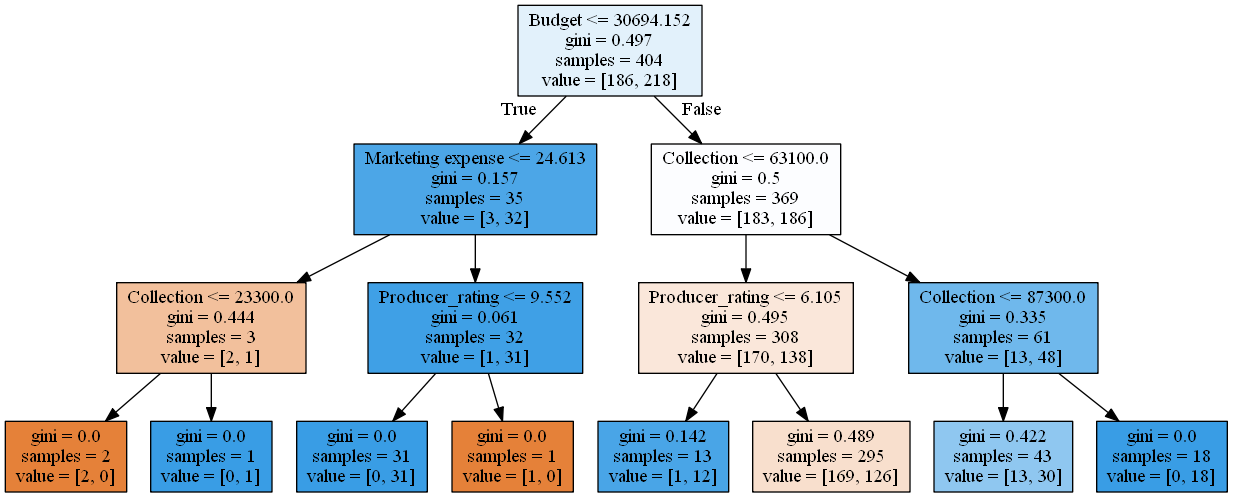

In [116]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

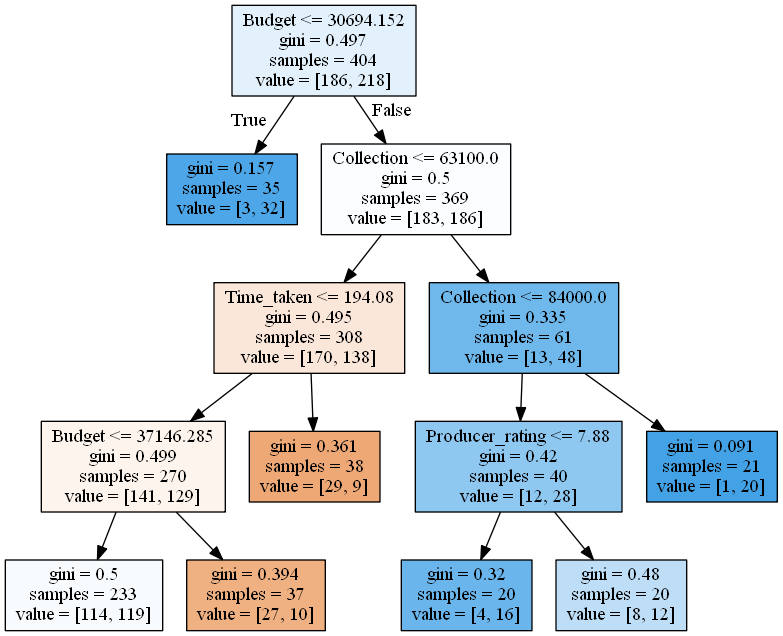

In [117]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [118]:
accuracy_score(y_test, clftree2.predict(X_test))

0.5588235294117647

### Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [119]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [120]:
from sklearn.ensemble import BaggingClassifier

In [121]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [122]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [123]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [124]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [127]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [128]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [129]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

### Grid Search :
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [132]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [133]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [135]:
grid_search.best_params_ 

{'max_features': 6, 'min_samples_split': 3}

In [136]:
cvrf_clf = grid_search.best_estimator_

In [137]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6274509803921569

In [138]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

### Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [140]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [141]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

In [142]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [143]:
accuracy_score(y_train, gbc_clf2.predict(X_train))

0.7623762376237624

In [144]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

### Ada Boost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [147]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [148]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.8886138613861386

In [149]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6274509803921569

In [150]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate =0.05, n_estimators =500)

In [151]:
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [152]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.5980392156862745

### XG Boost

http://xgboost.readthedocs.io/en/latest/

In [153]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [154]:
import xgboost as xgb

In [155]:
#### Prameter Tuning

##1. General Parameters: Guide the overall functioning
##2. Booster Parameters: Guide the individual booster (tree/regression) at each step
##3. Learning Task Parameters: Guide the optimization performed

In [156]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [157]:
xgb_clf.fit(X_train, y_train)

[02:26:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [158]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

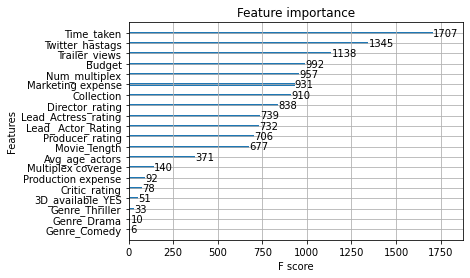

In [159]:
xgb.plot_importance(xgb_clf)

In [160]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [161]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [162]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [163]:
grid_search.fit(X_train, y_train)

[02:32:15] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [164]:
cvxg_clf = grid_search.best_estimator_

In [165]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6176470588235294

In [166]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.8}

## Stacking

In [167]:
from sklearn.ensemble import StackingClassifier

In [168]:
clfsc=StackingClassifier([('SGD',clf),('KNN',clf_knn_5),('LR',clflr),('DTREE',clftree)],final_estimator=KNeighborsClassifier())

In [169]:
clfsc.fit(X_train,y_train)

StackingClassifier(estimators=[('SGD', SGDClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('LR', LogisticRegression()),
                               ('DTREE', DecisionTreeClassifier())],
                   final_estimator=KNeighborsClassifier())

In [170]:
accuracy_score(y_test, clfsc.predict(X_test))

0.4411764705882353